**PUT YOUR NAME HERE**, Algorithms 605.621

Copyright Johns Hopkins University.  Not for distribution online or by any other means.

# Statement of Academic Integrity

**Statement of Integrity: I, Derek Zhu, state that I completed this assignment with integrity and by myself.**

# Instructions to Students
This programming assignment is contained entirely in this IPython/Jupyter notebook. You are to read the problem from this notebook, and answer questions/make required modifications in this same notebook and submit it as a notebook.  Look for **BOLDFACE AND/OR ALL CAPS** for where to put answers to written questions.  Do not delete the problem statements, text, etc, leave all that as-is (makes grading easier).

# Overview

Implement two algorithms to return the closest pair of points in a Euclidean two-dimensional plane.  The first algorithm shall be a brute-force approach, with improvements, that runs no worse than $\theta(n^2)$ time, and the second algorithm will be a recursive divide-and-conquer method that runs in $O(n\log(n))$ time.  You'll kick the tires on both of these and analyze runtime performance and improvements.

## Tasks
Specifically, you must:

1. Write the algorithms, in correct pseudocode notation.  [This part may have been assigned on a previous or concurrent homework assignment.]
1. Implement both algorithms correctly, in this notebook.
1. Compare/contrast algorithm performance via graphs.  In this one case, the performance is related to the number of calls to the distance method.
1. Discuss your experiences and opportunities to improve.

## Requirements
On the first algorithm, you must implement a brute-force method with *at least one improvement* over a very simple method.  The baseline is "for i in all points, for j in all points, call the distance function, yada yada" and you shall improve on that in at least one *asymptotically similar* way by cutting down the number of calls to the distance function.  More on that in the section down below.

On the second algorithm, you must implement it as the CLRS book describes in section 33.4 (and as you have fleshed out in the full realization of this algorithm; CLRS provides only a sketch).

You will plot a curve that shows the improvement of the second approach over the first.

## Constraints

The implementation is not collaborative.  While writing the algorithm may be a collaborative effort as indicated in one of the homework assignments, you must write your own code following the Programming Assignment Guidelines (Blackboard page Syllabus & Course Information ).  Pay careful attention to the academic integrity requirements regarding publicly available code.

Use the function signatures and any data structures as supplied$-$do not change function signatures or introduce strange calling conventions; the instructor's tests are written assuming these function signatures.  Further, beware of strange *side effects* that may cause bad behavior on subsequent runs of the code.  Be sure to "restart and run all" prior to submitting your notebook, as the instructor will do the same when testing.  Points will be deducted if the instructor has to make any changes in order to run your code.

The analysis and graphs must be driven with programmatically derived data, not "hard coded" or pasted in run counts.  An example of what **not** to do: xvals=[3, 4, 12, 15, 36, 47] /* hard coded */  Instead, xvals = [i for i in mycounts] where mycounts is an array updated through various trials you perform using your function(s).

As for notebook runtimes, the notebook must never exceed an execution time of FIVE WALL-CLOCK MINUTES.  If your notebook does not execute on a cloud service, such as Google Colaboratory, on the supplied instructor inputs within this time, points will be deducted.  It likely means there's a bug in your implementation.  If you have issues with this, reach out to your instructor.

# Closest Pairs (100 pts total)



## Preliminaries

Implement your algorithm in the Student Implementation block(s) and code to print your results. Your code must have a reasonable, consistent, style and commented documentation. It must have appropriate data structures and modularity.

Your code must appear in this notebook (not as an external library).  You may create additional notebook cells as necessary.  If present, preserve the instructor input block, and do not change names of any of the instructor supplied variables or data structures - they will be used by the instructor when testing your code. Output must be clear and nicely formatted.

Your code should be robust and have some error checking - we won't deliberately test for unusual/nonsense conditions, but our tests will include different data than supplied here so you want to be prepared for a variety of (well-formed) input conditions.  

If present, the instructor test block will be used to test your code; if the test block runs correctly, then your code has the correct function signature, and performs well when running multiple trials.  (The instructor may change or add to the test cases during grading.)

## Instructor Data Structures and Helpers

These are data structures that will be used throughout your implementation.  Although strongly cautioned against this, you can make modifications, but if present, ensure that the instructor test block functions correctly without modifications.

In [81]:
############################################################################
# INSTRUCTOR DATA STRUCTURES
# If you change these, don't break the instructor test block.
############################################################################
# Decorator example for counting function calls, adapted from
# https://stackoverflow.com/a/21717396/8542716
def call_counter(f):
    """
    Adds a ".calls" variable to the function that increments w/every call.
    Set it to zero between iterations.
    Example:
        @call_counter
        def sumallbelow(x):
          if x<1:
            return 0
          return x + sumallbelow(x-1)

        ...
        sumallbelow.calls = 0 # reset before any use
        print(f"The sum up to 4 is: {sumallbelow(4)}")
        print(f"and the call counts are {sumallbelow.calls}")

    """
    def wrapped(*args, **kwargs): # deal with any/all arguments
        wrapped.calls += 1
        return f(*args, **kwargs) # call the real function here
    wrapped.calls = 0
    return wrapped

class debugprint(object):
  """
  A debug print decorator useful for tracing the flow of recursive functions.
  It adds a "debugprint" method to each function call, that increases the
  number of spaces on each call before printing the output.

  To use, add @debugprint on top of your function.  Then, within your function
  foo, put foo.debugprint("whatever"), and it will print "whatever" with
  several spaces in front of it.  Recursive calls add to the spaces.  Enable
  with "debugprint.enabled = True", and disable w/False.

  There's also a counter called ".calls," which you reset like the counter
  decorator above.  Note, enabling/disabling does not affect the counter; the
  counter is always counting.

  Example:
      @debugprint
      def fib(N):
        fib.debugprint(f"inside fib({N})")
        if N<2:
          fib.debugprint(f"returning {N}")
          return N
        fib.debugprint(f"returning fib({N-1}) + fib({N-2})")
        return fib(N-1) + fib(N-2)

      # toggle this on/off as needed
      fib.enabled, fib.calls = True, 0
      print(f"The 3rd Fibonacci number is {fib(3)}")
      print(f"Number of calls is {fib.calls}")

  Output:
      inside fib(3)
      returning fib(2) + fib(1)
        inside fib(2)
        returning fib(1) + fib(0)
          inside fib(1)
          returning 1
          inside fib(0)
          returning 0
        inside fib(1)
        returning 1
      The 3rd Fibonacci number is 2
      Number of calls is 5

  Adapted from https://stackoverflow.com/a/862915/
  Also adding a calls counter because I cannot combine decorators
  """
  calls = 0
  enabled = False
  space = ""
  def __init__(self, func):
    self.func = func
  def __call__(self, *args, **kwargs):
    if self.enabled:
      # print 'Entering', self.func.func_name
      # print '    args:', args, kwargs
      pass
    self.space += "  "
    self.calls += 1
    result = self.func(*args, **kwargs)
    self.space = self.space[:-2]
    return result
  def debugprint(self, *args, **kwargs):
    if self.enabled:
      print(self.space+" ".join(map(str,args)), **kwargs)

class Point(object):
    """
    Data structure for points.  Methods include P.x, P.y and other Pythonisms
    necessary to use with sets, tuples, etc.
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __repr__(self):
        return f"Point({self.x},{self.y})"
    def __eq__(self, other): # need both eq and hash if you want to use sets
        return self.x == other.x and self.y == other.y
    def __hash__(self):
        return hash((self.x, self.y))
    def __iter__(self): # required to convert to tuple
        for i in [self.x, self.y]:
          yield i

## Brute Force Improved (45 pts)
Write code to print the closest pair of points, and their distance using the distance function.  Use a brute force technique, but with at least one asymptotically similar improvement that will speed up the operation.  

Return the number of calls to the distance function for each input data set.  Print out the closest pair of points, and their distance, and the number of calls to the distance function.

You must fix up the implementation of the distance function, which is currently incorrect.  Your brute force must call out to it, and return the counts of the number of times the distance function was called.

An *asymptotically similar* speedup is one that results in fewer calls to the dist function, but does not change the overall $n^2$ running time behavior.  Think of it as a quick fix.  It may change $\theta$ to $O$, and may change the constant $c$ in the definition $\theta(n) = c\cdot f(n)$, but it will not take the function to $n\log(n)$ or anything.  That's the point of the second implementation.  We need you to try at least one quick fix speedup.

There is a ``Point'' class data structure to use.  The inputs to both this and the CLRS function are Python arrays of Points.  Read the output block for the format and how to use the Points class.






### Brute Force Improved Implementation

In [82]:
############################################################################
# STUDENT IMPLEMENTATION BLOCK - Brute Force Improved
############################################################################
import math
# Student Euclidean Distance Function
@call_counter  # adds calls attribute to functions
def dist(p1, p2):
    """
    Calculate and return the Euclidean Distance between two Points
    p1, p2 are Points
    """

    distance = math.sqrt((p1.x - p2.x) * (p1.x - p2.x) + (p1.y - p2.y) * (p1.y - p2.y))

    return distance

# Implementation of Student Closest Points algorithm
TurnOnBruteForceImprovedImplementation=True
def closestPairBrute(points):  # Preserve the function name and arguments
    """
    This is the Brute Force Improved n^2 implementation;
    Input: points is an array of Points, it has at least two Points;
    Ouput: the closest 2 points, the Euclidean distance between them, and calls to the distance function.
    """

    # initalize closest 2 points by using the first two Points in the array:
    p1, p2 = points[0], points[1]
    dist.calls=0
    min_distance = dist(p1, p2)

    numPoints = len(points)
    for i in range(0, numPoints):
        for j in range(i+1, numPoints):
          if  (i==0 and j==1):
            continue;

          # **************** Brute Force Improved Implementation: ********************
          # the idea is: if the x or y difference between the Points is
          # not less than the min_distance, then the distance between the
          # two Points must not less than the min_distance, therefore we
          # just skip it without calling the dis() function:
          if TurnOnBruteForceImprovedImplementation==True:
            if (abs(points[i].x - points[j].x) >= min_distance) :
              continue;
            if (abs(points[i].y - points[j].y) >= min_distance) :
              continue;
          # ***************************************************************************

          currDist = dist(points[i], points[j])
          if min_distance > currDist:
            p1, p2 = points[i], points[j]
            min_distance = currDist

    return p1, p2, min_distance, dist.calls


### Brute Force Improved Output

In [83]:
############################################################################
# STUDENT OUTPUT BLOCK
############################################################################
# This block should run your function and produce output that matches the input
# and output.

POINTS=[Point(1,2), \
        Point(4,3), \
        Point(9,8), \
        Point(9,2), \
        Point(8,2), \
        Point(4,5)]
dist.calls = 0 # reset before every run
p1, p2, d, c = closestPairBrute(POINTS)
print(f"Closest pair of points are {p1} and {p2}, distance = {d:.2f}")
print(f"Call counts on dist = {c}")

Closest pair of points are Point(9,2) and Point(8,2), distance = 1.00
Call counts on dist = 4


## CLRS Algorithm (15 pts)

Implement the closest pair of points described in the CLRS textbook, 3rd ed, in section 33.4.  Input and output will be as with the brute force method, but your implementation will run in $n\log(n)$ time.

For this problem, you will need to create additional functions, including at least one recursive function.  The function shown below, ``closestPairCLRS``, will act as a front-end, or "kickoff" function to the recursive function.  The kickoff function will perform preliminary setup and organization of input data as explained in CLRS, then it will call out to a recursive function (named whatever you like) that you will write, using your own function signature, to solve the problem efficiently.  

**Note on Sorting:** on this assignment and related assignments, we are **not** asking you to implement a sorting algorithm.  If you need a sorting function, use the Python built-in sort methods.  **Do not spend your time implementing MergeSort** or some other sorting algorithm.  Because we are not asking you to implement sorting, sorting is therefore not *central to the assignment.*

### CLRS Implementation

In [84]:
# STUDENT RECURSIVE FUNCTION GOES HERE

def closest_split_pair(points_x_sorted, points_y_sorted, delta, best_pair):
    """
    Input: points_x_sorted is an array of Points sorted in x-coordinate;
           points_y_sorted is an array of Points sorted in y-coordinate;
           delta is the rectanle hight,
           best_pair is a pair of Points that have distance delta
    Ouput: the closest 2 points, the Euclidean distance between them.
    """

    length_x = len(points_x_sorted) // 2
    minddle_x = points_x_sorted[length_x].x
    sorted_y = [p for p in points_y_sorted if minddle_x - delta <= p.x <= minddle_x + delta]
    best = delta
    length_y = len(sorted_y)

    # check the 2x1 delta rectangle to see if any points in it
    # the rectangle can hold up 7 Points, hence we only check the
    # next 7 Points:
    for i in range(length_y - 1):
        for j in range(i + 1, min(i + 7, length_y)):
            p, q = sorted_y[i], sorted_y[j]
            dst = dist(p, q)
            if dst < best:
                best_pair = p, q
                best = dst

    return best_pair, best

def closest_pair_rec(points_x_sorted, points_y_sorted):
    """
    Input: points_x_sorted is an array of Points sorted in x-coordinate;
           points_y_sorted is an array of Points sorted in y-coordinate
    Ouput: the closest 2 points, the Euclidean distance between them, and calls to the distance function.
    """

    # the base case to stop the recursive call
    # since the problem size is small enough
    if len(points_x_sorted) <= 3:
        return closestPairBrute(points_x_sorted)

    # find the middle line to split all the Points
    # into two subset in terms of x-coordinate:
    mid = len(points_x_sorted) // 2
    left_points_x_sorted = points_x_sorted[:mid]
    right_points_x_sorted = points_x_sorted[mid:]
    midpoint = points_x_sorted[mid]
    left_points_y_sorted = [p for p in points_y_sorted if p.x <= midpoint.x]
    right_points_y_sorted = [p for p in points_y_sorted if p.x > midpoint.x]

    # find the closest pair of Points in the left sub points:
    left_point_1, left_point_2, delta_left, dist_calls_1 = closest_pair_rec(left_points_x_sorted, left_points_y_sorted)

    # find the closest pair of Points in the right sub points:
    right_point_1, right_point_2, delta_right, dist_calls_2 = closest_pair_rec(right_points_x_sorted, right_points_y_sorted)

    # compare the left pair with the right pair, chose the closest pair of Points:
    delta = delta_left if delta_left < delta_right else delta_right
    pair = (left_point_1, left_point_2) if delta_left < delta_right else (right_point_1, right_point_2)


    # find the closest pair in the 2x1 delta rectangle:
    (middle_point_1, middle_point_2), delta_middle = closest_split_pair(points_x_sorted, points_y_sorted, delta, pair)

    # return the closest pair of Points
    if delta <= delta_middle:
        return pair[0], pair[1], delta, dist_calls_1 + dist_calls_2
    else:
        return middle_point_1, middle_point_2, delta_middle, dist_calls_1 + dist_calls_2



In [85]:
############################################################################
# STUDENT IMPLEMENTATION BLOCK - CLRS
############################################################################
# Implementation of Student Closest Points algorithm
def closestPairCLRS(points):  # Preserve the function name and arguments
    """
    This is CLRS 𝑛log(𝑛) runtime implementation;
    Input: points is an array of Points, it has at least two Points;
    Ouput: the closest 2 points, the Euclidean distance between them, and calls to the distance function.
    """

    # get the x-sorted the points:
    points_x_sorted = sorted(points, key=lambda k: k.x)

    # get the y-sorted the points:
    points_y_sorted = sorted(points, key=lambda k: k.y)

    p1, p2, distance, dist_calls = closest_pair_rec(points_x_sorted, points_y_sorted)

    return p1, p2, distance, dist_calls

### CLRS Output

In [86]:
############################################################################
# STUDENT OUTPUT BLOCK
############################################################################
# This block should run your function and produce output that matches the input
# and output.

POINTS=[Point(1,2), \
        Point(4,3), \
        Point(9,8), \
        Point(9,2), \
        Point(8,2), \
        Point(4,4)]
dist.calls = 0 # reset before every run
p1, p2, d, c = closestPairCLRS(POINTS)
print(f"Closest pair of points are {p1} and {p2}, distance = {d:.2f}")
print(f"Call counts on dist = {c}")
dist.calls = 0
p1, p2, d, c = closestPairBrute(POINTS)
print(f"Compare to Brute which says {p1}, {p2}, {d} and {c} calls.")

Closest pair of points are Point(8,2) and Point(9,2), distance = 1.00
Call counts on dist = 5
Compare to Brute which says Point(4,3), Point(4,4), 1.0 and 3 calls.


## Instructor Test Block
The instructor will run a test block very similar to this to evaluate the correctness of your implementation. This block is a subset of the full suite of tests.  *Your implementation must pass these supplied tests (at the minimum)*.

Consider this test block a preview.  During grading, the instructor will replace the contents of the block including inputs and code (so don't put anything critical in here - it will get erased during grading), but the tests will function similarly.

You are permitted to change this block, and I encourage you to add your own test cases!  Just make sure it passes the supplied cases and you'll do fine.

In [87]:
# INSTRUCTOR TEST BLOCK
from math import log2
asPoints = lambda A: [Point(a,b) for a,b in A]

def myassert(case, cond):
    if not cond:
        print(f"FAILED CASE, case={case}")

def myTest(func, inp, ans, cnt=0):
  """
  case is array of points,
  ans is tuple of ((p1, p2), dist),
  cnt is max expected calls
  """
  myTest.count += 1
  if True: # try:
      dist.calls=0
      tup = func([p for p in asPoints(inp)]) # p1, p2, dist, calls
      p1, p2, d, dc = tup
      print(f"case {myTest.count:<2d} gives {p1}, {p2} dist {d:0.2f} in {dc} calls (max = {cnt:0.2f})", end=' ')
  else: # except Exception as e:
      print(" ")
      print("======== EXCEPTION ======== EXCEPTION ======== EXCEPTION")
      print("========",e)
  passed = True
  apts=asPoints(ans[1:])
  adst=ans[0]
  a1, a2 = apts
  passed &= set([p1,p2])==set([a1, a2])  # order not matters
  passed &= abs(adst-d) < 0.00001
  passed &= (not cnt or dc<=cnt)   # cnt implies we expect no more than count
  if passed:
    print(" ... passed")
    myTest.passed += 1
  else:
    print(" !!! failed !!!")
    print(f"FAILED CASE {myTest.count:02d}")
    xtup=(d, (p1.x, p1.y), (p2.x, p2.y))
    print(f"   expected {adst}, {a1}, {a2}, got {xtup} and {dc} calls")

closestPairBrute.ncalls = lambda n: n*(n-1)/2  # you can just add variables to funcs
closestPairCLRS.ncalls = lambda n: n*log2(n)*1.5
for func in [closestPairBrute, closestPairCLRS]:
  print(f"TESTING CASE {func.__name__} ----")
  myTest.count = 0
  myTest.passed = 0

  # Tests
  POINTS=[(1,1), (2,1)]
  ans=(1.0, (1,1), (2,1))
  myTest(func, POINTS, ans, func.ncalls(len(POINTS))) # last arg is max number of calls

  POINTS = [(1,0), (15,19), (10,13), (1,18), (18,4)]
  ans = (7.810249675906654, (15, 19), (10, 13))
  myTest(func, POINTS, ans, func.ncalls(len(POINTS)))

  POINTS = [(20,13), (17,4), (16,9), (0,4), (8,0), (14,20), (3,9), (4,17)]
  ans = (5.0990195135927845, (17,4), (16,9))
  myTest(func, POINTS, ans, func.ncalls(len(POINTS)))

  POINTS= [(2, 10), (19, 1), (10, 2), (14, 18)]
  ans=(9.055385138137417, (19, 1), (10, 2))
  myTest(func, POINTS, ans, func.ncalls(len(POINTS)))

  POINTS= [(3, 19), (4, 13), (0, 5), (18, 8), (7, 5), (12, 8), (10, 17), (19, 17), (13, 4)]
  ans=(4.123105625617661, (12, 8), (13, 4)) # CLRS calls = 13
  myTest(func, POINTS, ans, func.ncalls(len(POINTS)))

  print(f"---- PASSED {myTest.passed} of {myTest.count} cases")

TESTING CASE closestPairBrute ----
case 1  gives Point(1,1), Point(2,1) dist 1.00 in 1 calls (max = 1.00)  ... passed
case 2  gives Point(15,19), Point(10,13) dist 7.81 in 3 calls (max = 10.00)  ... passed
case 3  gives Point(17,4), Point(16,9) dist 5.10 in 4 calls (max = 28.00)  ... passed
case 4  gives Point(19,1), Point(10,2) dist 9.06 in 3 calls (max = 6.00)  ... passed
case 5  gives Point(12,8), Point(13,4) dist 4.12 in 6 calls (max = 36.00)  ... passed
---- PASSED 5 of 5 cases
TESTING CASE closestPairCLRS ----
case 1  gives Point(1,1), Point(2,1) dist 1.00 in 1 calls (max = 3.00)  ... passed
case 2  gives Point(10,13), Point(15,19) dist 7.81 in 2 calls (max = 17.41)  ... passed
case 3  gives Point(17,4), Point(16,9) dist 5.10 in 4 calls (max = 36.00)  ... passed
case 4  gives Point(19,1), Point(10,2) dist 9.06 in 2 calls (max = 12.00)  ... passed
case 5  gives Point(13,4), Point(12,8) dist 4.12 in 4 calls (max = 42.79)  ... passed
---- PASSED 5 of 5 cases


## Analysis (30 pts)
Perform tests to compare the asymptotic behavior of the Brute Force Improved method to the CLRS method.

<font color='red'>Note, if you did not attempt, or were not able to get the CLRS method working reliably, plot the performance of the Brute Force Improved.</font>

As with every programming assignment this semester, *running time* implies execution steps, not clock time, versus size of the input data.  Use the counts of the ``dist()`` function as collected above, and plot over various trial cases using the graph below.  (You may use this graph code for future assignments, or you can put in your own, as long as it is reasonable.)

Think: what goes on the x axis?  What goes on the y axis?  How do you modify your code above to exercise the different inputs?  Label the axes, use the right data, make this look *professional.*  Also, pay attention to the asymptotic bounds.  Compare simple to improved on the same graph.

***Then, write a description below the figure of what is happening.***

Please note, graphs must tell a story.  The better your graph is, the more descriptive, (appropriate scale to "zoom in" on the required features), the better the story it tells.  Use colors, points, symbols, a good key, good labels, make this look professional.  If you are comparing two alternatives, find a way to overlay their runs on a single graph.  Really, really try to sell me graphically on your improvements.

Things to consider:
* How many points do you plot?  Notice there are too many red x's.
* Which bounding functions do you include?  Not all of them.  Can you "bring them in a little" to make them tighter to your function?

You may reuse this plot style on future assignments, or augment it as you wish.  Tell us a good story!  **Don't forget the writeup.**



### Data Collection
Run repeated tests over input sizes N to collect data for your plot.  Then, modify the code in the Plot section to display these run counts.

In [88]:
# STUDENT DATA COLLECTION CELL
#
# FILL THIS OUT WITH CODE TO RUN YOUR FUNCTIONS OVER MULTIPLE SIZES OF INPUTS.
# YOU MAY REUSE CODE FROM ABOVE, INCLUDING ANY SUPPLIED INSTRUCTOR CODE, TO
# GENERATE THE CASES.
#
# AS WITH ANY CODE YOU WRITE, USE GOOD COMMENTS.

# WRITE EXPERIMENT CODE HERE, THEN
# SET THIS VARIABLE BELOW TO REFLECT YOUR RUN COUNTS.
# Then edit the plot code in the next block to make it clear, add labels, etc.
# INCLUDE ENOUGH TRIALS.  HINT, 10 IS NOT "ENOUGH" FOR CLOSEST POINTS.
# mybrutecounts = [0.8*x**1.9 for x in range(50)] # this is just a stub
# myCLRScounts = [0.7*x**1.8 for x in range(50)] # this is just a stub

# my code here:
import random

NUM_POINTS = 200
MAX_XY = 100000000

myCLRScounts = [0,]
mybrutecounts_no_improved = [0,]
mybrutecounts_improved = [0,]
myDiff_CLRS_Brute= [0,]
total_mybrutecounts_no_improved = 0
total_mybrutecounts_improved = 0
total_myCLRScounts = 0
# Generate i of random points
TEST_POINTS=[Point(random.randint(-MAX_XY, MAX_XY), random.randint(-MAX_XY, MAX_XY)) for _ in range(NUM_POINTS)]

for i in range(2, NUM_POINTS):

  TurnOnBruteForceImprovedImplementation=False
  dist.calls = 0
  p1, p2, d, c1 = closestPairBrute(TEST_POINTS[:i])
  mybrutecounts_no_improved.append(c1)
  total_mybrutecounts_no_improved += c1

  TurnOnBruteForceImprovedImplementation=True
  dist.calls = 0
  p1, p2, d, c2 = closestPairBrute(TEST_POINTS[:i])
  mybrutecounts_improved.append(c2)
  total_mybrutecounts_improved += c2

  dist.calls = 0 # reset before every run
  p1, p2, d, c3 = closestPairCLRS(TEST_POINTS[:i])
  myCLRScounts.append(c3)
  total_myCLRScounts += c3

  myDiff_CLRS_Brute.append(c3-c2)

print(f"total_myCLRScounts= {total_myCLRScounts} calls, total_mybrutecounts_no_improved= {total_mybrutecounts_no_improved} calls, total_mybrutecounts_improved= {total_mybrutecounts_improved} calls")


total_myCLRScounts= 11117 calls, total_mybrutecounts_no_improved= 1313400 calls, total_mybrutecounts_improved= 2053 calls


### Plot
Make adjustments to the code below.  Plots must tell a story; show that Brute Force approximates one well known distribution, and CLRS another.

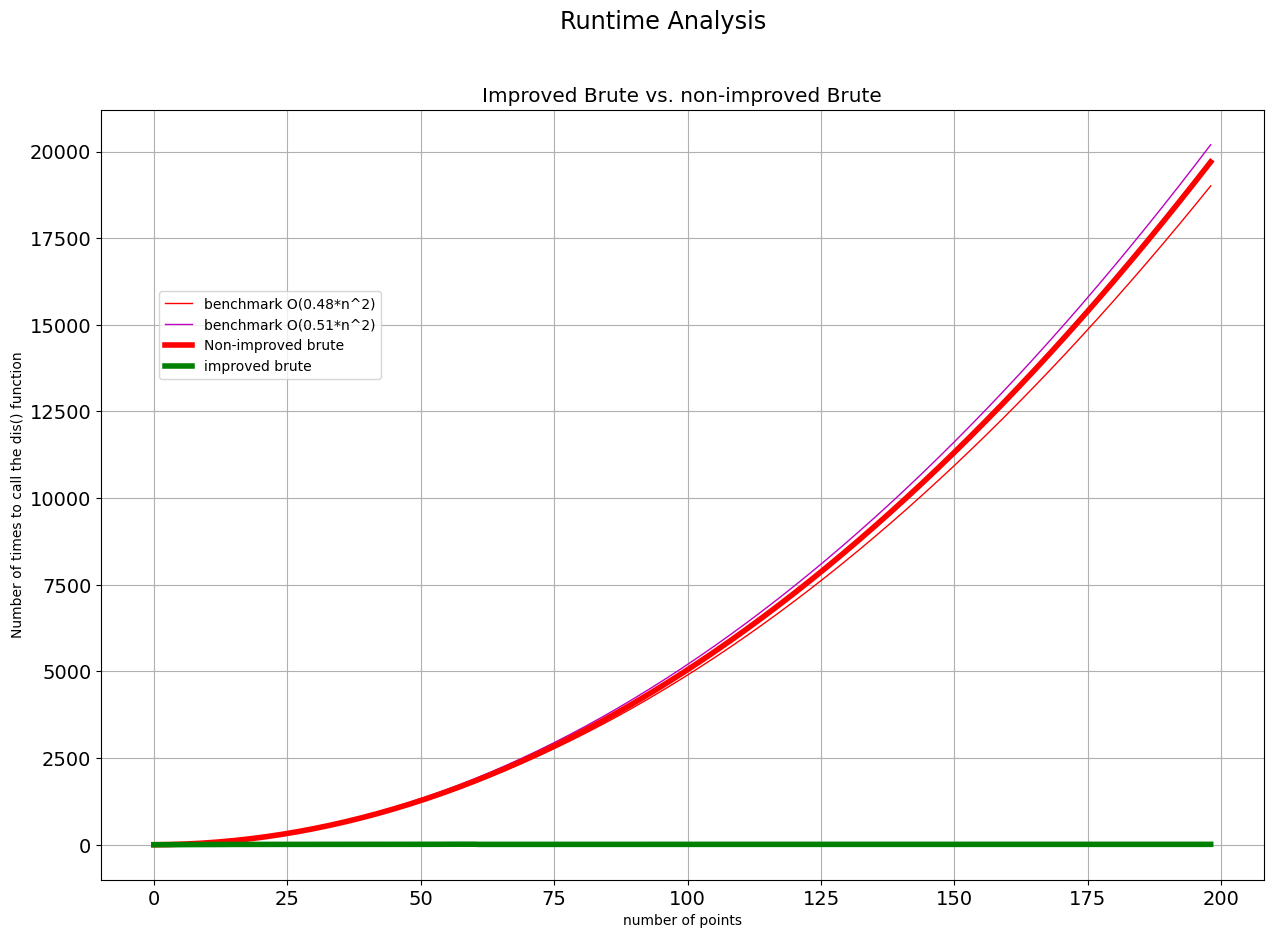

In [112]:
# Code adapted from Sahil Sharma, used with permission, from Spring, 2021

from math import pow
from math import log2
from math import factorial

# REQUIRES mybrutecounts, myCLRScounts set above
N=len(mybrutecounts_no_improved)

# benchmark data set generation
yTestVals1 = [0,] # quadratic for O(n^2)
yTestVals2 = [0,] # quadratic for O(n^2)


# generate bench mark data for O(n), O(n^2), O(nlog(n)), O(10*nlog(n)), and O(n!)
for i in range(2, N+1):
    yTestVals1.append(0.48*i**2)
    yTestVals2.append(0.51*i**2)

# %matplotlib inline
import matplotlib.pyplot as plt

# Brute vs. CLRS execution steps
plt.rcParams['figure.figsize'] = [15,10]
fig, (ax1) = plt.subplots(1, 1)
fig.suptitle('Runtime Analysis', size="xx-large")

# plotting nearest neighbor execution steps
ax1.set_title('Improved Brute vs. non-improved Brute', size="x-large")
ax1.plot(range(N), yTestVals1, "r^-", markersize=0, linewidth=1, label="benchmark O(0.48*n^2)")
ax1.plot(range(N), yTestVals2, "m^-", markersize=0, linewidth=1, label="benchmark O(0.51*n^2)")
ax1.plot(range(N), mybrutecounts_no_improved, "r^-", markersize=0, linewidth=4, label="Non-improved brute")
ax1.plot(range(N), mybrutecounts_improved, "g^-", markersize=0, linewidth=4, label="improved brute")

ax1.grid(which='major', axis='both')
ax1.set(xlabel = 'number of points', ylabel = 'Number of times to call the dis() function')
ax1.legend(loc=(0.05,0.65), scatterpoints=10)
ax1.tick_params(axis="both", which="major", labelsize=14)

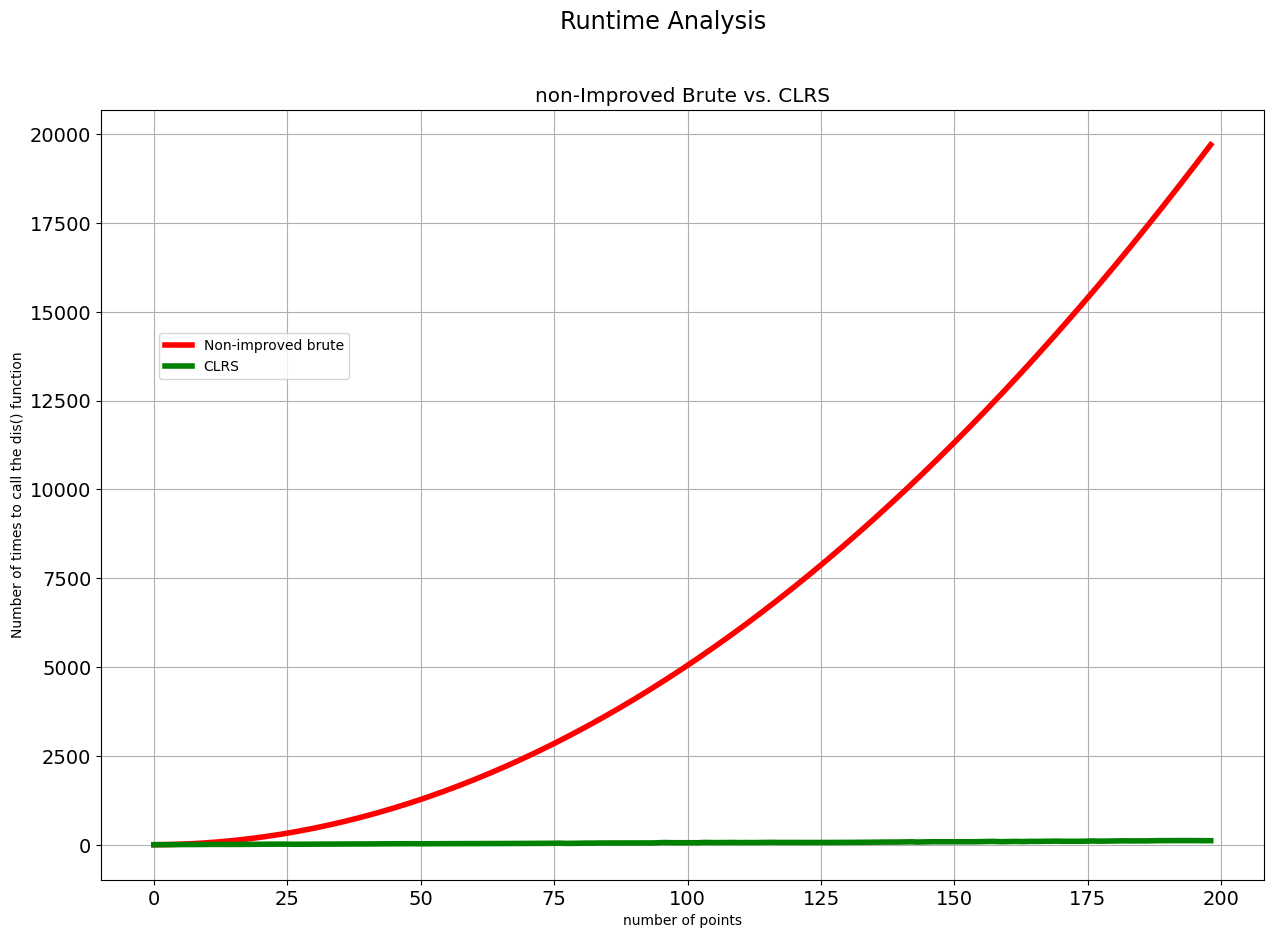

In [113]:
# Code adapted from Sahil Sharma, used with permission, from Spring, 2021

from math import pow
from math import log2
from math import factorial

# REQUIRES mybrutecounts, myCLRScounts set above
N=len(mybrutecounts_no_improved)

# benchmark data set generation
yTestVals1 = [0,] # linear for O(n)
yTestVals2 = [0,] # inear for O(n)

# generate bench mark data for O(n), O(n^2), O(nlog(n)), O(10*nlog(n)), and O(n!)
for i in range(2, N+1):
    yTestVals1.append(0.45*i)
    yTestVals2.append(0.75*i)

# %matplotlib inline
import matplotlib.pyplot as plt

# Brute vs. CLRS execution steps
plt.rcParams['figure.figsize'] = [15,10]
fig, (ax1) = plt.subplots(1, 1)
fig.suptitle('Runtime Analysis', size="xx-large")

# plotting nearest neighbor execution steps
ax1.set_title('non-Improved Brute vs. CLRS', size="x-large")
ax1.plot(range(N), mybrutecounts_no_improved, "r^-", markersize=0, linewidth=4, label="Non-improved brute")
ax1.plot(range(N), myCLRScounts, "g^-", markersize=0, linewidth=4, label="CLRS")
ax1.grid(which='major', axis='both')
ax1.set(xlabel = 'number of points', ylabel = 'Number of times to call the dis() function')
ax1.legend(loc=(0.05,0.65), scatterpoints=10)
ax1.tick_params(axis="both", which="major", labelsize=14)

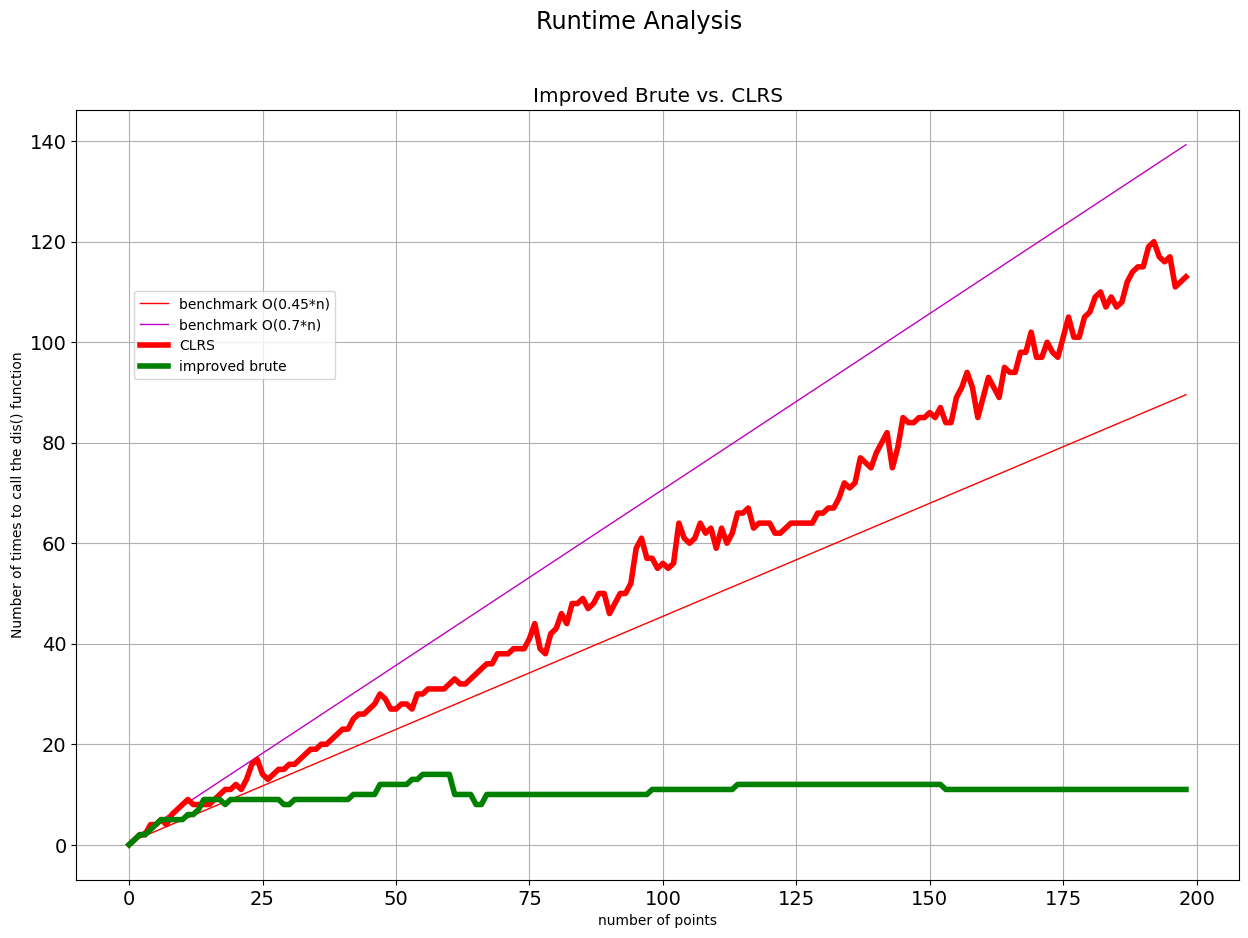

In [115]:
# Code adapted from Sahil Sharma, used with permission, from Spring, 2021

from math import pow
from math import log2
from math import factorial

# REQUIRES mybrutecounts, myCLRScounts set above
N=len(mybrutecounts_no_improved)

# benchmark data set generation
yTestVals1 = [0,] # linear for O(n)
yTestVals2 = [0,] # inear for O(n) # not quadratic for O(n^2)
# yTestVals3 = [0,] # n*log(n) for O(nlog(n))
# yTestVals4 = [0,] # 5*n*log(n) for O(nlog(n))

# generate bench mark data for O(n), O(n^2), O(nlog(n)), O(10*nlog(n)), and O(n!)
for i in range(2, N+1):
    # UPDATE THE COEFFICIENTS TO THESE FUNCTIONS TO BRING SOME IN "TIGHT" TO
    # THE BRUTE FORCE, and some to the CLRS, or add others.
    yTestVals1.append(0.45*i)
    yTestVals2.append(0.7*i)
    # yTestVals2.append(pow(i, 2))
    # yTestVals3.append(i*log2(i))
    # yTestVals4.append(5*i*log2(i))

# %matplotlib inline
import matplotlib.pyplot as plt

# Brute vs. CLRS execution steps
# plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams['figure.figsize'] = [15,10]
fig, (ax1) = plt.subplots(1, 1)
fig.suptitle('Runtime Analysis', size="xx-large")

# plotting nearest neighbor execution steps
ax1.set_title('Improved Brute vs. CLRS', size="x-large")
ax1.plot(range(N), yTestVals1, "r^-", markersize=0, linewidth=1, label="benchmark O(0.45*n)")
ax1.plot(range(N), yTestVals2, "m^-", markersize=0, linewidth=1, label="benchmark O(0.7*n)")
ax1.plot(range(N), myCLRScounts, "r^-", markersize=0, linewidth=4, label="CLRS")
ax1.plot(range(N), mybrutecounts_improved, "g^-", markersize=0, linewidth=4, label="improved brute")
ax1.grid(which='major', axis='both')
ax1.set(xlabel = 'number of points', ylabel = 'Number of times to call the dis() function')
ax1.legend(loc=(0.05,0.65), scatterpoints=10)
ax1.tick_params(axis="both", which="major", labelsize=14)

### Analysis Writeup

***I WILL WRITE MY DESCRIPTION HERE OF WHAT IS HAPPENING REGARDING THE FIGURE ABOVE.  I WILL DISCUSS THE TIGHTEST ASYMPTOTIC NOTATION OF THE ALGORITHM.***

## Retrospection (10 pts)
Talk about how you did on this assignment.  This is just feedback to the instructor.  You can edit this cell and answer inline in non-bold.  Please go into some detail.
* **What was the last bug you found and fixed?** my detailed discussion of a bug; this assignment might not be so bad, but there may be some tricky cases on future ones
* **What are some late-breaking ideas you had for improving your implementation, that maybe you didn't have time to implement?** my thoughts
* **What did you feel you learned from this assignment?** my thoughts
* **How would you improve this assignment for future semesters?** my thoughts

If there's anything else you'd like to say, feel free to write it.


# Citations
Include citations for any and all help you received.

# Submission Reminders

Submit to Blackboard per instructions found on Blackboard.  In most cases, you just upload your ipynb file.  Before you do that,


* "restart and run all" before submitting.  Make sure it runs and does not throw exceptions, even if it does not pass all the test cases.  The grader "restarts and runs all" and expects it to run completely through.  We have graded many assignments where the student has done only a partial run, or run things out of order, leaving around old variables that give false results, only to have it throw an exception or give a different answer when the grader runs it.

* Rerun your code blocks, make sure you get the same answer each time.  The instructor's test block makes repeated calls to your code, and if you've left a stray variable that doesn't get cleared, it could affect the results.  

* Make sure you've completed every task in this notebook.

* If there's a plot required, make sure it's legible, axes correctly labeled, and that it "tells a story" about what is being shown.

* Double check that you have not changed the function signature.

* Include a statement of academic integrity in the block at the top.  

* Put your name at the top.